### Analizar las tendencias alrededor de HR Analytics en Google Trends en el pasado año

#### He usado de referencia el tutorial de Google Trens for Python (https://towardsdatascience.com/google-trends-api-for-python-a84bc25db88f)

In [1]:
!pip install pytrends

In [2]:
import pandas as pd                        
from pytrends.request import TrendReq
pytrend = TrendReq()
import requests
import json
from pandas import json_normalize

In [3]:
pytrend.build_payload(kw_list=['HR Analytics'])

In [4]:
# Vamos a ver por región qué interés tiene "HR Analytics"
df_HRA = pytrend.interest_by_region()

In [5]:
#Los resultados son porcentuales
df_HRA.sort_values(by = "HR Analytics", ascending = False)

,HR Analytics
geoName,
Singapore,100
India,55
St. Helena,50
Netherlands,44
United Arab Emirates,33
...,...
Guernsey,0
Guinea,0
Guinea-Bissau,0


In [6]:
df_HRA.describe()

,HR Analytics
count,250.000000
mean,2.648000
std,9.712126
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,100.000000


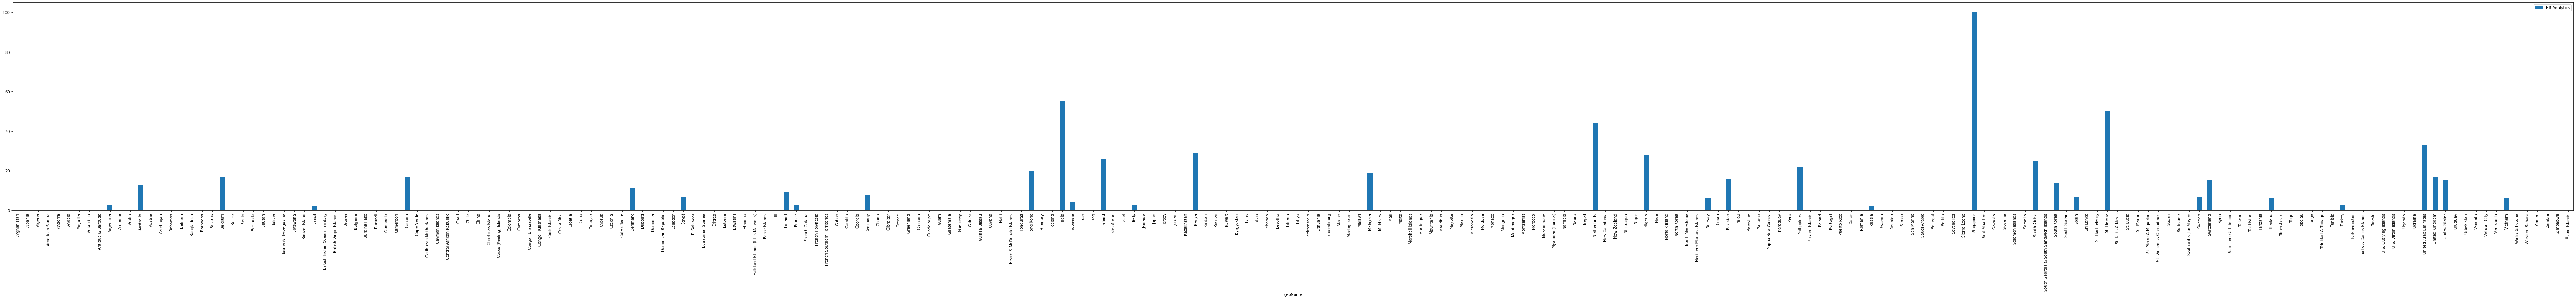

In [7]:
#Hemos probado de hacer la visualización inicial pero necesitamos hacer trimming antes
df_HRA.reset_index().plot(x='geoName', y='HR Analytics', figsize=(120, 10), kind ='bar')

In [8]:
#Para inspeccionar los datos, vamos a cargarnos los que nos den 0
#Como vamos a hacer drops, vamos a hacer otro df de seguridad
df2 = df_HRA

In [9]:
#Para inspeccionar los datos, vamos a cargarnos los que nos den 0
#He visto esta fórmula en Stack Overflow y aunque no sé bien qué hace la "T", me lo ha arreglao :)

df2 = df2[(df2.T != 0).any()]

In [10]:
df2.sort_values(by = "HR Analytics", ascending = False)

,HR Analytics
geoName,
Singapore,100
India,55
St. Helena,50
Netherlands,44
United Arab Emirates,33
Kenya,29
Nigeria,28
Ireland,26
South Africa,25


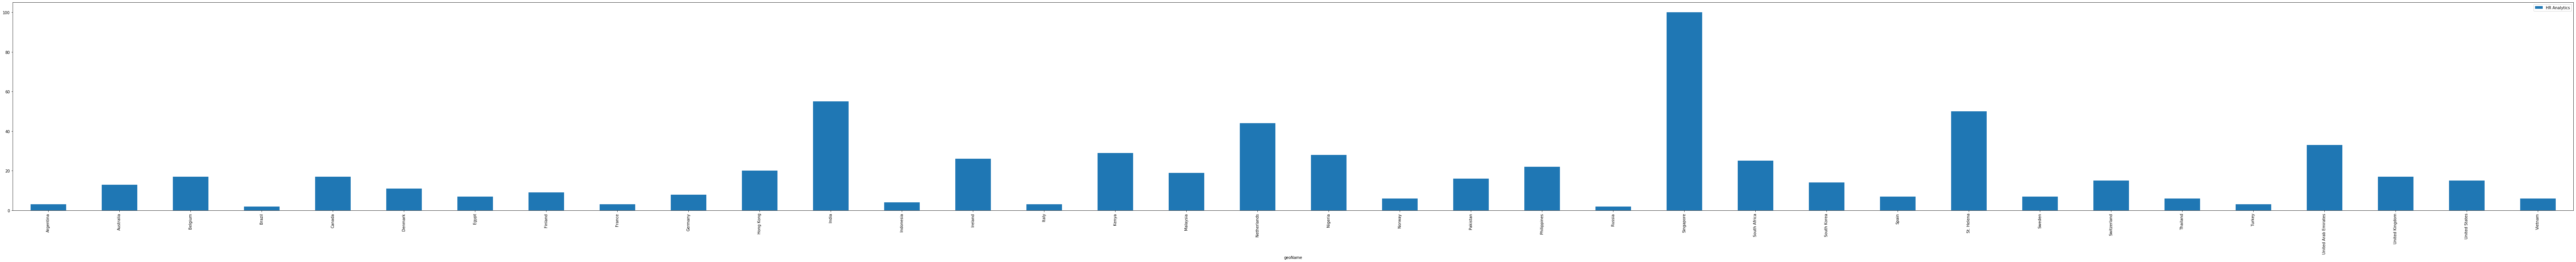

In [11]:
#Volvemos a repetir el gráfico ahora con países con relevancia:
df2.reset_index().plot(x='geoName', y='HR Analytics', figsize=(120, 10), kind ='bar')

In [12]:
df_HRA = df2

In [13]:
#Vamos a añadir una columna para crear un ranking de los países:
#df2.ranking = df2["HR Analytics"]
df2["HRA_Rank"] = df2["HR Analytics"].rank(ascending = False).astype(int)


In [14]:
#Le cambio el nombre al df de HRA
df_HRA = df2.sort_values(by = "HRA_Rank", ascending = True)

In [15]:
df_HRA

,HR Analytics,HRA_Rank
geoName,,
Singapore,100,1
India,55,2
St. Helena,50,3
Netherlands,44,4
United Arab Emirates,33,5
Kenya,29,6
Nigeria,28,7
Ireland,26,8
South Africa,25,9


### Ya que estamos y que ha sido fácil sacar los resultados de HR Analytics, vamos a sacar también los de conceptos relacionados: People Analytics y Talent Analytics

In [16]:
#Empezamos con People Analytics:

In [17]:
pytrend.build_payload(kw_list=['People Analytics'])

In [18]:
#Creamos el df
df_PA = pytrend.interest_by_region()

In [19]:
#Nos cargamos los que devuelvan 0%
df_PA = df_PA[(df_PA.T != 0).any()]

In [20]:
#Creamos el ranking
df_PA["PA_Rank"] = df_PA["People Analytics"].rank(ascending = False).astype(int)

In [21]:
#Ordenamos el df por la columna del ranking
df_PA = df_PA.sort_values(by = "PA_Rank", ascending = True)

In [22]:
df_PA

,People Analytics,PA_Rank
geoName,,
Singapore,100,1
Canada,52,2
Ireland,52,2
Australia,50,5
United States,50,5
United Kingdom,50,5
Nigeria,49,7
United Arab Emirates,37,8
India,37,8


In [23]:
#Ahora vamos con Talent Analytics:

In [24]:
pytrend.build_payload(kw_list=['Talent Analytics'])

In [25]:
df_TA = pytrend.interest_by_region()

In [26]:
#Nos cargamos los que devuelvan 0%
df_TA = df_TA[(df_TA.T != 0).any()]

In [27]:
df_TA.sort_values(by = "Talent Analytics", ascending = False)

,Talent Analytics
geoName,
India,100
United States,81
United Kingdom,62
Australia,61
Canada,57


In [28]:
#Creamos el ranking
df_TA["TA_Rank"] = df_TA["Talent Analytics"].rank(ascending = False).astype(int)

In [29]:
#Ordenamos el df por la columna del ranking
df_TA = df_TA.sort_values(by = "TA_Rank", ascending = True)

In [30]:
df_TA

,Talent Analytics,TA_Rank
geoName,,
India,100,1
United States,81,2
United Kingdom,62,3
Australia,61,4
Canada,57,5


### Vamos a unir los tres df usamos como key los países para ver cómo rankean alrededor de los 3 conceptos:

In [31]:
#Unimos el df de HRA y el de PA por el nombre del país como índice
df_total = pd.merge(df_HRA, df_PA, how = "left", on = "geoName")

In [32]:
df_total

,HR Analytics,HRA_Rank,People Analytics,PA_Rank
geoName,,,,
Singapore,100,1,100.0,1.0
India,55,2,37.0,8.0
St. Helena,50,3,NaN,NaN
Netherlands,44,4,30.0,11.0
United Arab Emirates,33,5,37.0,8.0
Kenya,29,6,NaN,NaN
Nigeria,28,7,49.0,7.0
Ireland,26,8,52.0,2.0
South Africa,25,9,34.0,10.0


In [33]:
#Unimos el df_total con el df de TA también por el nombre del país
df_total_total = pd.merge(df_total, df_TA, how = "left", on = "geoName")

In [34]:
df_total_total

,HR Analytics,HRA_Rank,People Analytics,PA_Rank,Talent Analytics,TA_Rank
geoName,,,,,,
Singapore,100,1,100.0,1.0,NaN,NaN
India,55,2,37.0,8.0,100.0,1.0
St. Helena,50,3,NaN,NaN,NaN,NaN
Netherlands,44,4,30.0,11.0,NaN,NaN
United Arab Emirates,33,5,37.0,8.0,NaN,NaN
Kenya,29,6,NaN,NaN,NaN,NaN
Nigeria,28,7,49.0,7.0,NaN,NaN
Ireland,26,8,52.0,2.0,NaN,NaN
South Africa,25,9,34.0,10.0,NaN,NaN


In [35]:
#Por algún motivo, no me respeta que las columnas de ranking de TA y de PA sean integers
#Supongo que sólo me lo hace si ordena por esa columna

In [39]:
df_total_total.to_csv("./PR03_csv_ProjectAPIGoogleTrends.csv")